In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('ccdefault.csv')

In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

The dataset has 30,000 observations (rows) and 23 attributes (columns).  The row index (ID) column can be deleted.

- This dataset has imbalanced classes.
- LIMIT_BAL is a currency amount.

#### Target Variables
- The class variable (DEFAULT) is binary: 1 for defaults and 0 for non-defaults.
- There are 23,364 non-defaults and only 6,636 defaults observed.

#### Categorical Variables
- SEX, EDUCATION and MARRIAGE are categorical.

#### Numeric  Variables
- AGE.
- PAY_1 through PAY_6 categorical for the past six month's payment history.  
- BILL_AMT1 through BILL_AMT6 are the last 6 month's billing cycles.
- PAY_AMY1 through PAY_AMT6 are the paid amounts.


The dataset comes from: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.  It can be found on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients Links to an external site.

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

The dataset does not contain any null values.

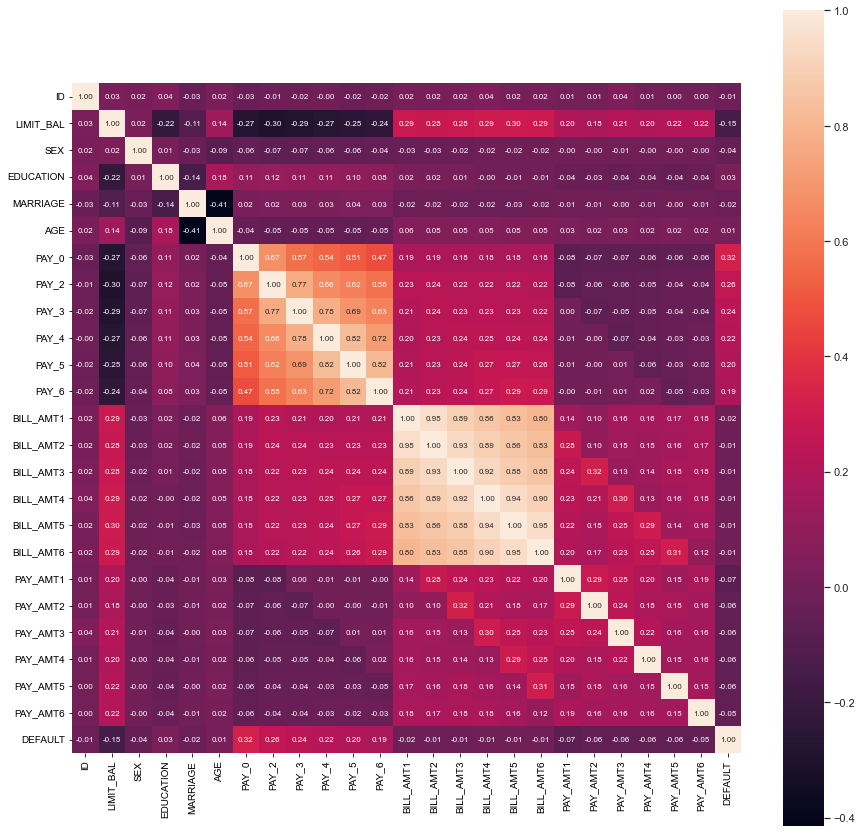

In [7]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':8});

- Any variables with correlation higher than 0.5 or lower than -0.5 are considered to have a high correlation
Observations:
- Consecetive Payments are correlated
- Consecetive Bill Amounts are highly correlated too
- This is proof for what we observed in the pairplot above.

Let's build our models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

target = df.loc[:,'DEFAULT']

fold_no = 1
for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    print('Fold',str(fold_no),'Class Ratio:',sum(test['DEFAULT'])/len(test['DEFAULT']))
    fold_no += 1

Fold 1 Class Ratio: 0.22133333333333333
Fold 2 Class Ratio: 0.22133333333333333
Fold 3 Class Ratio: 0.22133333333333333
Fold 4 Class Ratio: 0.22133333333333333
Fold 5 Class Ratio: 0.22133333333333333
Fold 6 Class Ratio: 0.22133333333333333
Fold 7 Class Ratio: 0.221
Fold 8 Class Ratio: 0.221
Fold 9 Class Ratio: 0.221
Fold 10 Class Ratio: 0.221


In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [13]:
# We define impurity functions
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

In [14]:
scores = pd.DataFrame(columns=['Random State/Fold No','Train Accuracy','Test Accuracy'])
scores

,Random State/Fold No,Train Accuracy,Test Accuracy


In [15]:
from sklearn.metrics import accuracy_score

def train_model(train, test, fold_no):
    X = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    y = ['DEFAULT']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=fold_no)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    t1 = pd.DataFrame({'Random State/Fold No':fold_no,'Train Accuracy':round(train_accuracy,3), 'Test Accuracy':round(test_accuracy,3)}, index=[0])
    return t1
#     print(t1)
# 'Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))

In [16]:
fold_no = 1
for train_index, test_index in skf.split(df, target):

    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    t2 = train_model(train,test,fold_no)
    fold_no += 1
    
    if fold_no==1:
        scores = t2
    else:
        scores = pd.concat([scores, t2])
#     print(t2)

In [17]:
scores

,Random State/Fold No,Train Accuracy,Test Accuracy
0,1,0.826,0.809
0,2,0.826,0.803
0,3,0.825,0.815
0,4,0.826,0.808
0,5,0.825,0.807
0,6,0.824,0.827
0,7,0.823,0.836
0,8,0.823,0.831
0,9,0.823,0.827
0,10,0.824,0.824


In [18]:
scores = scores.astype(float)

<AxesSubplot:xlabel='Random State/Fold No'>

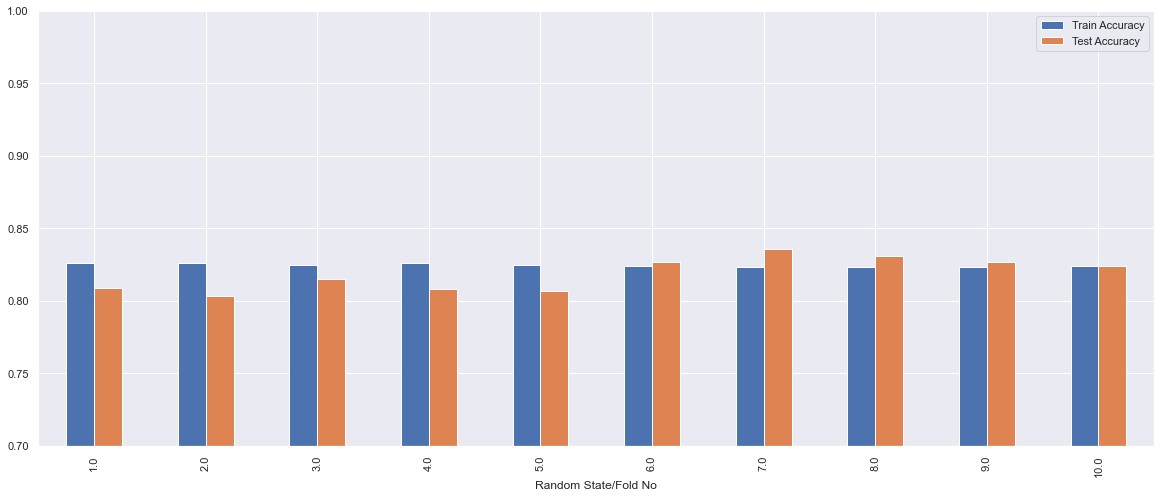

In [19]:
plt.rcParams['figure.figsize'] = [20, 8]
scores.plot(x='Random State/Fold No',kind='bar',ylim=(0.7,1))

In [20]:
def meansd1(scores):
    mean_train = scores["Train Accuracy"].mean()
    sd_train = scores['Train Accuracy'].std()

    mean_test = scores["Test Accuracy"].mean()
    sd_test = scores['Test Accuracy'].std()

    # print("Mean: "+str(mean)+'\n')
    # print("Std Dev: "+str(sd)+'\n')

    data = {'Statistic': ['Training', 'Testing'],
            'Mean': [mean_train, mean_test],
            'Std Dev': [sd_train, sd_test]}

    stats = pd.DataFrame(data)
    return stats

In [21]:
t1= meansd1(scores)
t1

,Statistic,Mean,Std Dev
0,Training,0.8245,0.001269
1,Testing,0.8187,0.011653


In [22]:
# Referred here: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv):

    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return {
          "Validation Accuracy scores": results['test_accuracy'],
          "Validation Precision scores": results['test_precision'],
          "Validation Recall scores": results['test_recall'],
          "Validation F1 scores": results['test_f1'],
          }

In [23]:
# x

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)

x = df.drop(['DEFAULT'],axis=1)
y = df['DEFAULT']

decision_tree_result = cross_validation(decision_tree_model, x, y, 10)
# print(decision_tree_result)
# decision_tree_result

In [25]:
decision_tree_result = pd.DataFrame(decision_tree_result)
decision_tree_result

,Validation Accuracy scores,Validation Precision scores,Validation Recall scores,Validation F1 scores
0,0.678000,0.307398,0.362952,0.332873
1,0.726333,0.378295,0.367470,0.372804
2,0.706667,0.356383,0.403614,0.378531
3,0.718333,0.369030,0.384036,0.376384
4,0.705333,0.328660,0.317771,0.323124
5,0.710000,0.381609,0.500000,0.432855
6,0.729667,0.383281,0.366516,0.374711
7,0.745333,0.416252,0.378582,0.396524
8,0.736000,0.379439,0.306184,0.338898
9,0.695333,0.348247,0.434389,0.386577


<AxesSubplot:>

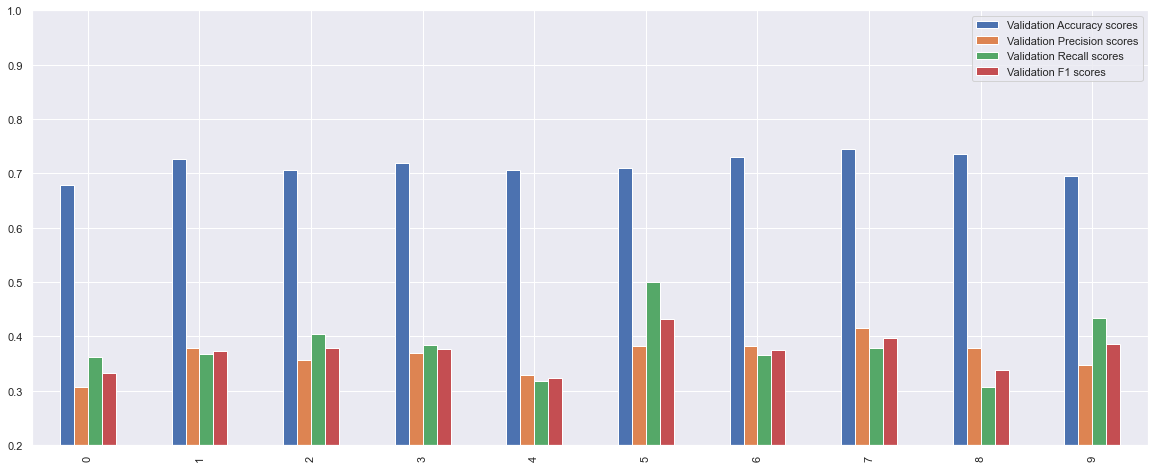

In [26]:
plt.rcParams['figure.figsize'] = [20, 8]
decision_tree_result.plot(kind='bar',ylim=(.2,1))

In [27]:
def meansd2(scores):
    
    meant = []
    sdt = []
    types = []
    
    for column in scores:
        types.append(str(column))
        meant.append(scores[column].mean())
        sdt.append(scores[column].std())
    
    t = pd.DataFrame({'Type':types,'Mean':meant, 'Std Dev':sdt})
    return t

In [28]:
t = meansd2(decision_tree_result)

In [29]:
t

,Type,Mean,Std Dev
0,Validation Accuracy scores,0.715100,0.020164
1,Validation Precision scores,0.364859,0.030969
2,Validation Recall scores,0.382151,0.055616
3,Validation F1 scores,0.371328,0.032657


The Average Accuracy for Decision tree using stratified sampling was higher than using cross_val. The cross_val model also seemed to be overfit in cross_val as we can observe a large difference in accuracies with the training and testing datasets. Overall, the decision tree with a stratified sampling seems to be the better model to use.

In [30]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
